### About Dataset

This data set provides a comprehensive record of daily gold prices from January 19, 2014 to January 22, 2024. The data is provided by Nasdaq and includes key financial metrics for each trading day.

#### Source

This data set was obtained from www.nasdaq.com, a reputable financial data platform. Data collection involves obtaining daily gold prices for ten years from January 19, 2014 to January 22, 2024, which contains important data for analyzing market trends and fluctuations. The reliability of the database is strengthened by the fact that it comes from Nasdaq, a trusted source in the financial industry, ensuring the accuracy and integrity of the gold price data collected.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

df = pd.read_csv('./data/goldstock.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,4/15/2024,2383.0,336608.0,2369.4,2404.3,2340.2
1,4/12/2024,2374.1,463075.0,2389.4,2448.8,2350.6
2,4/11/2024,2372.7,247444.0,2351.7,2395.6,2343.1
3,4/10/2024,2348.4,342343.0,2372.4,2378.1,2337.1
4,4/9/2024,2362.4,270153.0,2358.1,2384.5,2355.7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2533 non-null   object 
 1   Close/Last  2533 non-null   float64
 2   Volume      2512 non-null   float64
 3   Open        2533 non-null   float64
 4   High        2533 non-null   float64
 5   Low         2533 non-null   float64
dtypes: float64(5), object(1)
memory usage: 118.9+ KB


In [3]:
# Changing "Unnamed: 0" colum namedf
df.rename(columns={'Close/Last': 'close'}, inplace=True)

# Lowercase all column names
df.columns = [col.lower() for col in df.columns]

#View
df.head()

,date,close,volume,open,high,low
0,4/15/2024,2383.0,336608.0,2369.4,2404.3,2340.2
1,4/12/2024,2374.1,463075.0,2389.4,2448.8,2350.6
2,4/11/2024,2372.7,247444.0,2351.7,2395.6,2343.1
3,4/10/2024,2348.4,342343.0,2372.4,2378.1,2337.1
4,4/9/2024,2362.4,270153.0,2358.1,2384.5,2355.7


In [4]:
# Parsing 'date' column: Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Calculating maximum and minimum dates: Find the maximum and minimum dates in the 'date' column
max_date = df['date'].max()  # Maximum date in the DataFrame
min_date = df['date'].min()  # Minimum date in the DataFrame

# Print the maximum and minimum dates
print(max_date)  # Print the maximum date
print(min_date)  # Print the minimum date


2024-04-15 00:00:00
2014-04-15 00:00:00



## 1.Data Visualization

Features:

- *Close:* The closing price of gold on the relevant date
- *Volume:* Gold trading volum of the relevant date
- *Open:* The opening Price of gold on te relevant date 
- *High:* The highedt recorded price of gold during the trading day
- *Low:* Te lowedt price recorde for gold in the trading day

Target: Predict the high Gold Price

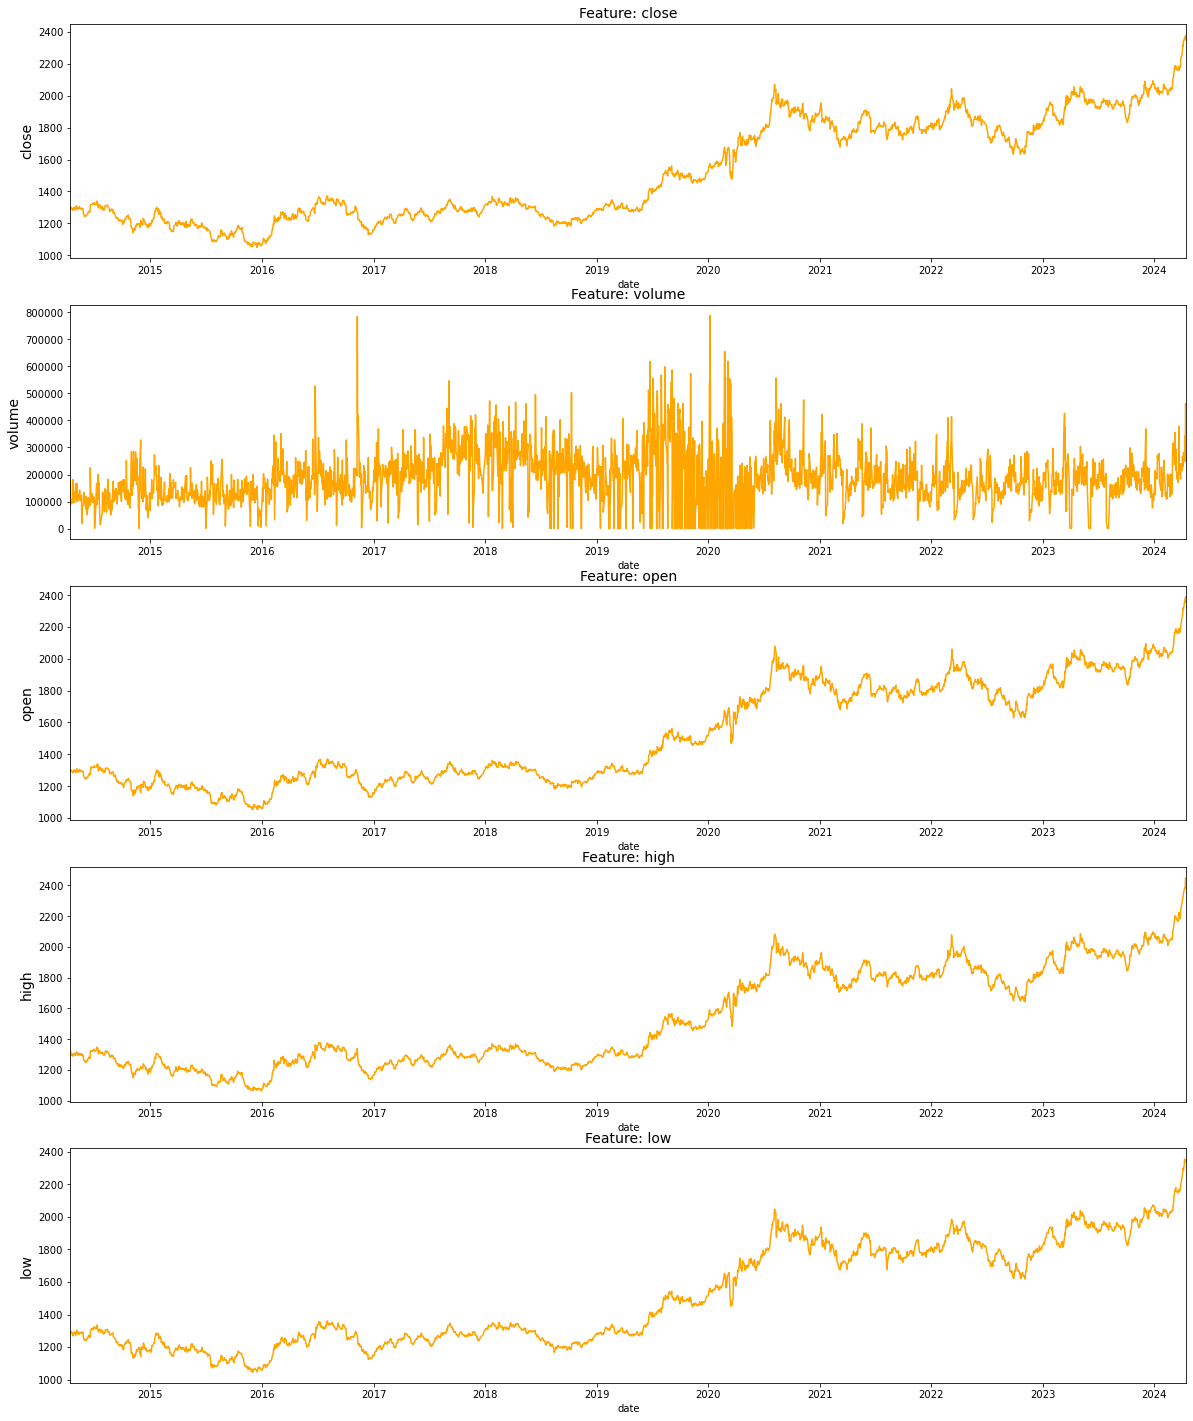

In [5]:

drop_col = ['date']

f, ax = plt.subplots(nrows=5, ncols=1, figsize=(20, 25))

for i, column in enumerate(df.drop(drop_col, axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column], ax=ax[i], color='orange')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([min_date, max_date])

## 2. Data Preprocessing

### Equidistant Timestamp
The data should be in chronological order and be equidistant in time series, in the case that the data is not equidistant we will tryout some methods to deal wit irregularities

In [6]:
# Sorting date in chronological order
df = df.sort_values(by='date')

#Check time interval s
df['delta'] = df['date'] - df['date'].shift(1)

#View
df[['date', 'delta']].head()

,date,delta
2532,2014-04-15,NaT
2531,2014-04-16,1 days
2530,2014-04-17,1 days
2529,2014-04-18,1 days
2528,2014-04-21,3 days


In [7]:
df['delta'].sum(),df['delta'].count()

(Timedelta('3653 days 00:00:00'), 2532)

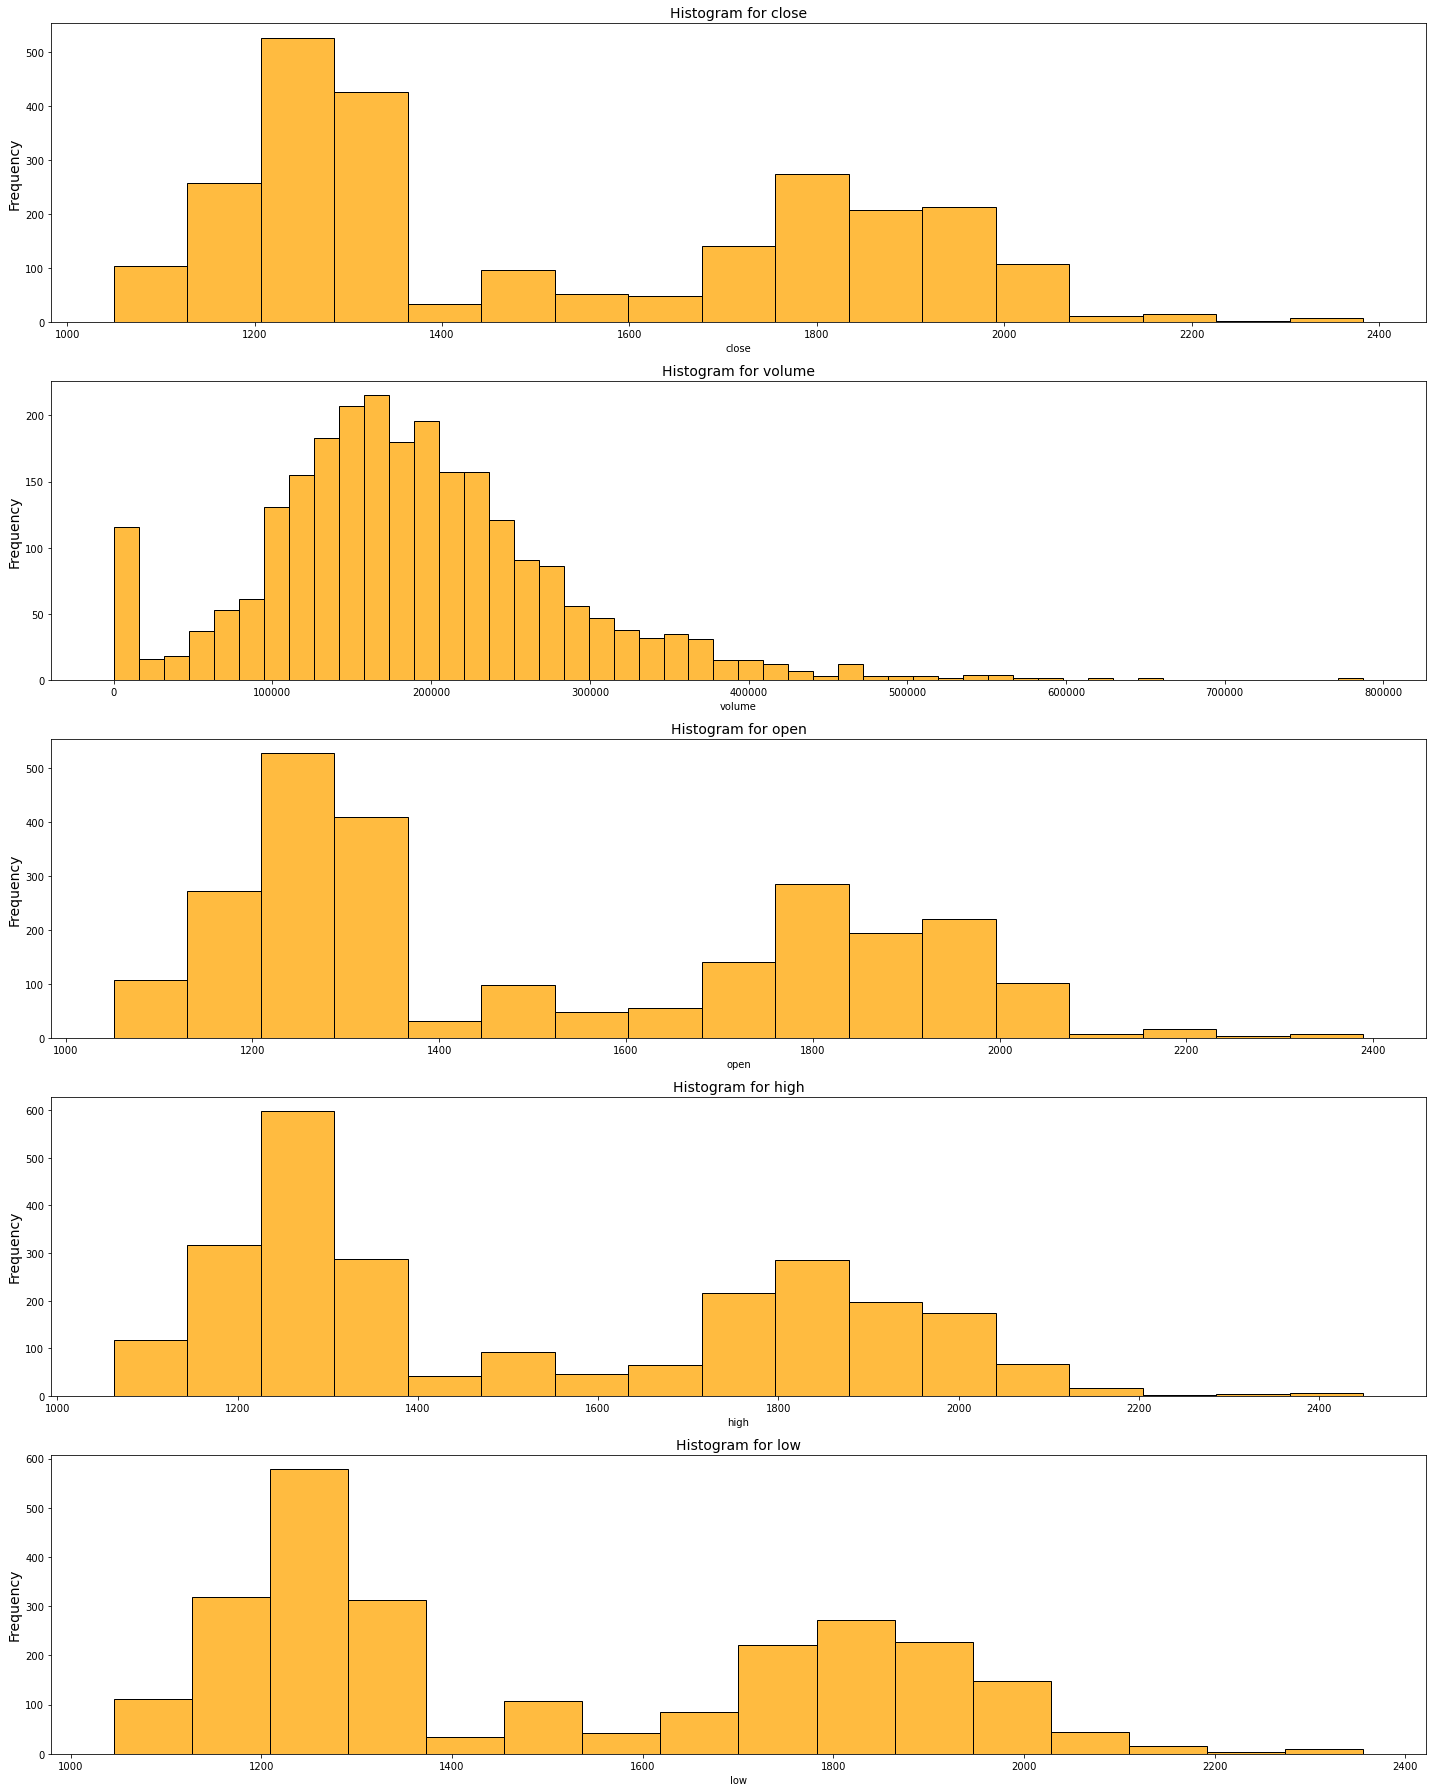

In [8]:

drop_col = ['date','delta']

f, ax = plt.subplots(nrows=5, ncols=1, figsize=(20, 25))

for i, column in enumerate(df.drop(drop_col, axis=1).columns):
    sns.histplot(df[column], ax=ax[i], color='orange')
    ax[i].set_title('Histogram for {}'.format(column), fontsize=14)
    ax[i].set_ylabel('Frequency', fontsize=14)
                      
plt.tight_layout()
plt.show()


To address irregular time intervals in your time-series data, you can take several approaches:

Resampling: Resampling involves adjusting the timestamps in your data to make them evenly spaced. You can resample your data to a fixed frequency, such as hourly, daily, or monthly, depending on the requirements of your analysis. Pandas provides convenient methods like resample() to help with this task.

Interpolation: If resampling is not suitable for your data or if you want to preserve the original timestamps, you can use interpolation techniques to estimate the values at regular intervals. Common interpolation methods include linear interpolation, polynomial interpolation, and spline interpolation.

Time Alignment: If your dataset contains multiple time series that need to be aligned, you can use time alignment techniques to synchronize the timestamps. This ensures that corresponding data points across different time series are aligned correctly.

Aggregation: If your data includes irregularly spaced timestamps but you're interested in summary statistics or aggregates over fixed intervals, you can aggregate the data using methods like groupby() followed by aggregation functions such as mean(), sum(), or count().

Missing Data Handling: If irregular timestamps are due to missing data points, you may need to handle missing values appropriately. Depending on the context, you can choose to fill missing values using methods like forward filling (ffill), backward filling (bfill), mean imputation, or interpolation.

Adjust Analysis Methods: In some cases, it may be appropriate to adjust your analysis methods to accommodate irregular time intervals. For example, you can use time-weighted averages or adapt time-series models to handle irregularly spaced data.

The choice of method depends on the specific characteristics of your data, the objectives of your analysis, and the assumptions of the analysis techniques you plan to use. It's essential to consider the implications of each approach and choose the one that best suits your needs while maintaining the integrity of your analysis results.




Choosing the interpolation method depends on the characteristics of your data and the context of your analysis. Here are some factors to consider when selecting an interpolation method:

Linearity of Data: If your data exhibits a linear trend between consecutive data points, linear interpolation may be suitable. Linear interpolation assumes a straight line between two adjacent points and fills in missing values accordingly.

Smoothness of Data: If your data is smooth and continuous, spline interpolation methods, such as cubic spline or quadratic spline, may be appropriate. These methods fit smooth curves through the data points, providing a more natural interpolation compared to linear interpolation.

Accuracy Requirements: Consider the level of accuracy required for your analysis. Higher-order polynomial interpolation methods (e.g., cubic or quadratic) may provide more accurate results but can also be more prone to overfitting, especially with limited data points.

Data Variability: If your data is highly variable or contains outliers, robust interpolation methods, such as nearest-neighbor or polynomial fitting with regularization, may be more appropriate. These methods are less sensitive to extreme values and can provide more stable results.

Temporal Characteristics: Consider the temporal characteristics of your data, such as seasonality or periodicity. If your data exhibits periodic patterns, you may want to use interpolation methods that preserve these patterns, such as Fourier interpolation.

Data Distribution: Take into account the distribution of your data. If your data is non-linear or skewed, you may need to use non-linear interpolation methods, such as spline or polynomial interpolation, to capture the underlying data distribution accurately.

Computational Complexity: Consider the computational complexity of the interpolation method, especially for large datasets. Some interpolation methods may be computationally intensive and require more processing time and resources.

Data Integrity: Ensure that the interpolation method preserves the integrity of your data and does not introduce artifacts or distortions. Validate the interpolated results against known values or ground truth to assess the reliability of the method.

In practice, it's often beneficial to experiment with different interpolation methods and compare their performance based on metrics such as accuracy, smoothness, and computational efficiency. Additionally, consider consulting domain experts or literature in your field for guidance on interpolation methods commonly used in similar contexts.



In [9]:
# Assuming df is your DataFrame and you want to drop the 'variable_to_drop' column
df.drop(columns=['delta'], inplace=True)

Linear Regression Results for close:
Slope: -0.38648249477876956
Intercept: 2005.2023930681692
R-value (correlation coefficient): -0.9047998844338084
P-value: 0.0
Standard error: 0.0036155521882693855


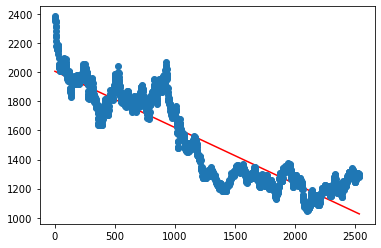

The time series close is likely linear.

Linear Regression Results for volume:
Slope: nan
Intercept: nan
R-value (correlation coefficient): nan
P-value: nan
Standard error: nan


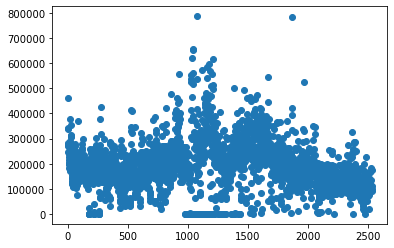

The time series volume may not be linear.

Linear Regression Results for open:
Slope: -0.38649018552314485
Intercept: 2005.1638074028974
R-value (correlation coefficient): -0.9046023687775377
P-value: 0.0
Standard error: 0.0036199755092740926


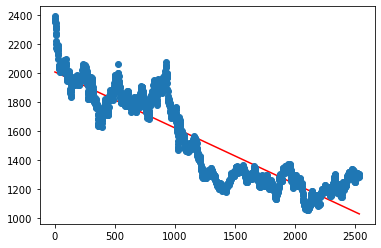

The time series open is likely linear.

Linear Regression Results for high:
Slope: -0.38914740925308916
Intercept: 2018.3389462099499
R-value (correlation coefficient): -0.903548916567301
P-value: 0.0
Standard error: 0.0036681913079140123


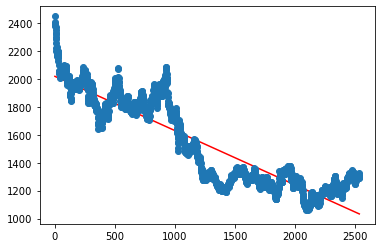

The time series high is likely linear.

Linear Regression Results for low:
Slope: -0.38379702451998005
Intercept: 1991.91482617297
R-value (correlation coefficient): -0.9060697222580465
P-value: 0.0
Standard error: 0.003562592156673091


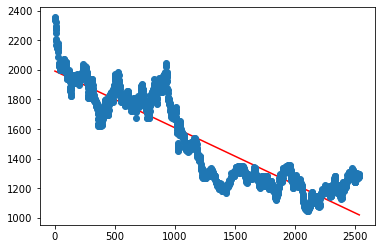

The time series low is likely linear.



In [10]:


for i in df.columns:
    if i == 'date':  # Skip the iteration if the column name is 'Date'
        continue


    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(df.index,df[i])

    # Print results
    print('Linear Regression Results for {}:'.format(i))
    print('Slope:', slope)
    print('Intercept:', intercept)
    print('R-value (correlation coefficient):', r_value)
    print('P-value:', p_value)
    print('Standard error:', std_err)

    line = slope*df.index + intercept
    plt.plot(df.index,line,'r-',df.index,df[i],'o')
    plt.show()
    
    # Assess linearity
    if p_value < 0.05:  # Using a significance level of 0.05
        print('The time series {} is likely linear.\n'.format(i))
    else:
        print('The time series {} may not be linear.\n'.format(i))


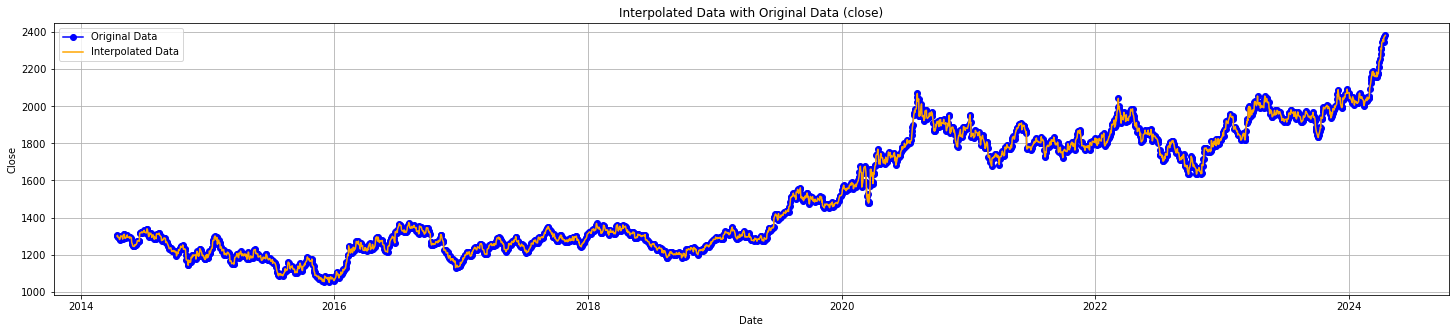

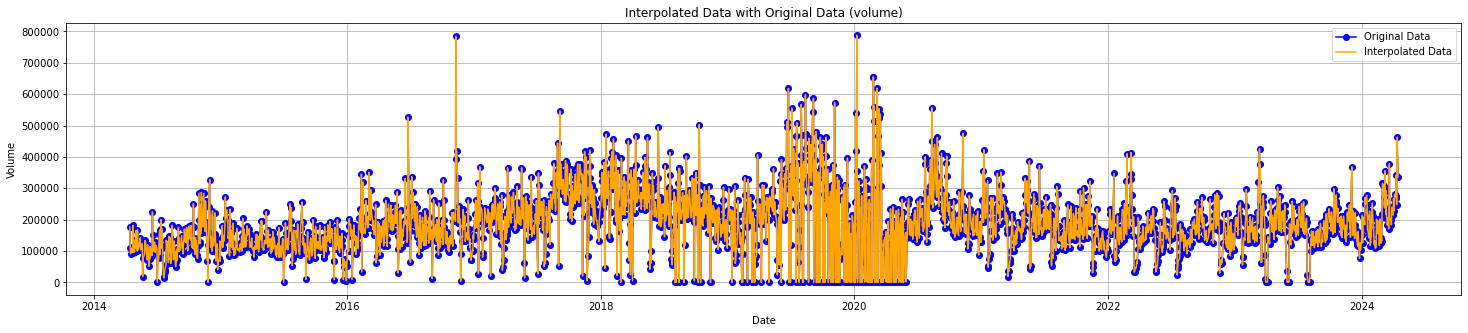

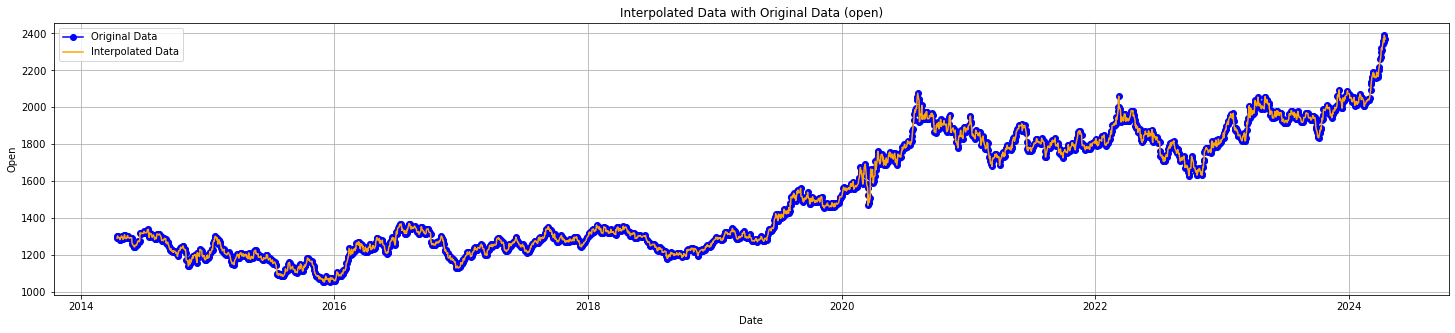

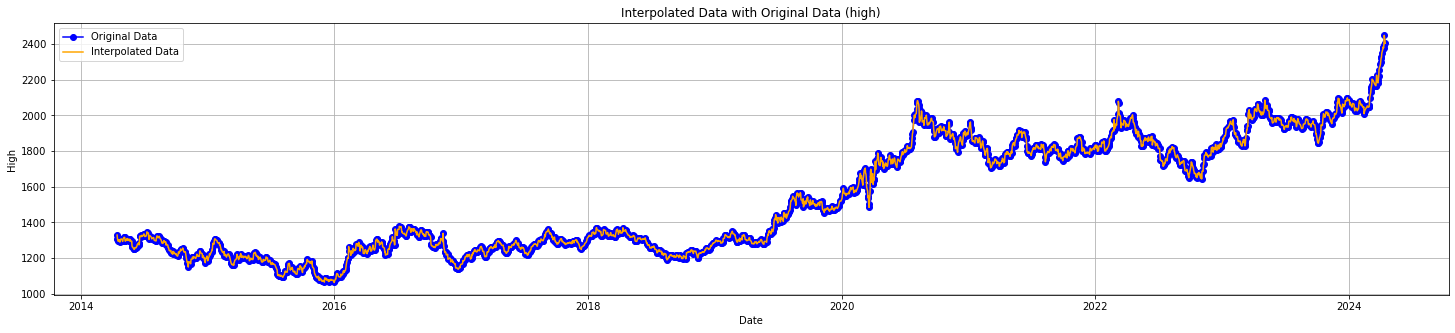

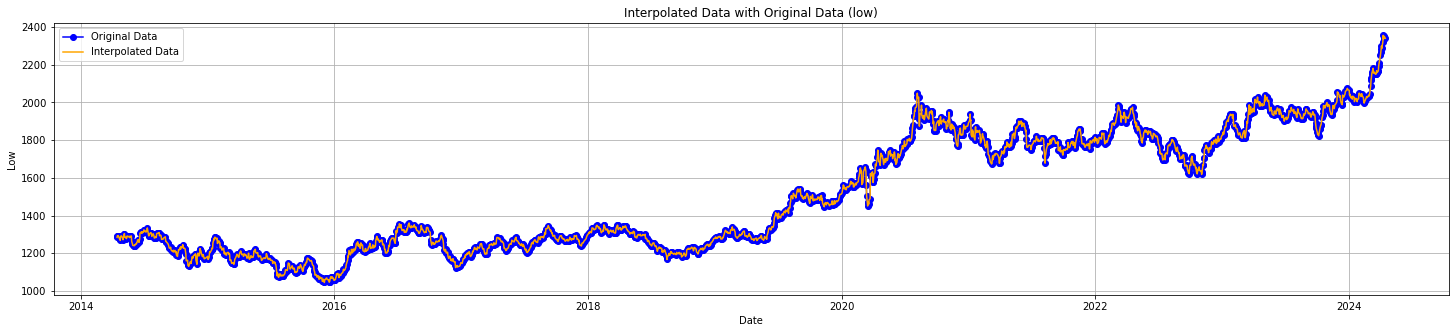

In [11]:

# Create a dataset_copy
non_equidistant_df = df.copy()

# Set 'date' column as the index
non_equidistant_df.set_index('date', inplace=True)

# Specify the desired constant time interval (e.g., daily, hourly)
constant_interval = 'D'  # Change 'D' to 'H' for hourly, 'M' for monthly, etc.

# Resample the data to the constant time interval using interpolation
df_interpolated = non_equidistant_df.resample(constant_interval).interpolate(method='linear')

# For 'Volume' column, use a different interpolation method
df_interpolated['volume'] = non_equidistant_df['volume'].resample(constant_interval).interpolate(method='polynomial', order =1)

# Iterate over each column and plot
for column in non_equidistant_df.columns:
    # Plot the original data
    plt.figure(figsize=(25, 5))
    plt.plot(non_equidistant_df.index, non_equidistant_df[column], 'o-', label='Original Data', color='blue')

    # Plot the interpolated data, using different method for 'Volume'
    if column == 'volume':
        method = 'spline'
    else:
        method = 'linear'
    plt.plot(df_interpolated.index, df_interpolated[column], '-', label='Interpolated Data', color='orange')

    plt.title(f'Interpolated Data with Original Data ({column})')
    plt.xlabel('Date')
    plt.ylabel(column.capitalize())  # Set y-label as column name capitalized
    plt.legend()
    plt.grid(True)
    plt.show()


In [12]:
df_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2014-04-15 to 2024-04-15
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   3654 non-null   float64
 1   volume  3654 non-null   float64
 2   open    3654 non-null   float64
 3   high    3654 non-null   float64
 4   low     3654 non-null   float64
dtypes: float64(5)
memory usage: 171.3 KB


In [13]:
# Sorting date in chronological order
df_interpolated = df_interpolated.sort_values(by='date')

# Calculate time intervals
df_interpolated['delta'] = df_interpolated.index - df_interpolated.index.shift(-1)

# View
print(df_interpolated[['delta']].head())

            delta
date             
2014-04-15 1 days
2014-04-16 1 days
2014-04-17 1 days
2014-04-18 1 days
2014-04-19 1 days


In [14]:
df_interpolated['delta'].sum(),df_interpolated['delta'].count()

(Timedelta('3654 days 00:00:00'), 3654)

In [15]:
# saving interpolate dataframe on to a new object
time_series = df_interpolated
time_series.drop(columns=['delta'], inplace=True)

## 2.1 Missing Values

In [16]:
time_series.isnull().any()

close     False
volume    False
open      False
high      False
low       False
dtype: bool

## 2.2 Smooting data 

### Resampling



Resampling can provide additional information on the data. There are two types of resampling:

- **Upsampling** is when the frequency of samples is increased (e.g. days to hours)
- **Downsampling** is when the frequency of samples is decreased (e.g. days to weeks)

When dealing with trading data and aiming to predict daily close prices, the choice between upsampling (increasing frequency) and downsampling (decreasing frequency) depends on your specific goals and the characteristics of your data:

Given that te goal is to preditc daily prices and volumums, resamply is not suitable. The data already provides daily price and volumns information. However for te same of curiosness, I will apply downsampling to the volume variable since this is the variable that is most difficult to read and down sampling could help resduce noise.

In [17]:
ts_max_date = time_series.index.max()
ts_min_date = time_series.index.min()
print("Oldest Date:", ts_min_date)
print("Earliest Date:", ts_max_date)


Oldest Date: 2014-04-15 00:00:00
Earliest Date: 2024-04-15 00:00:00


C:\Users\gleid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gleid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gleid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


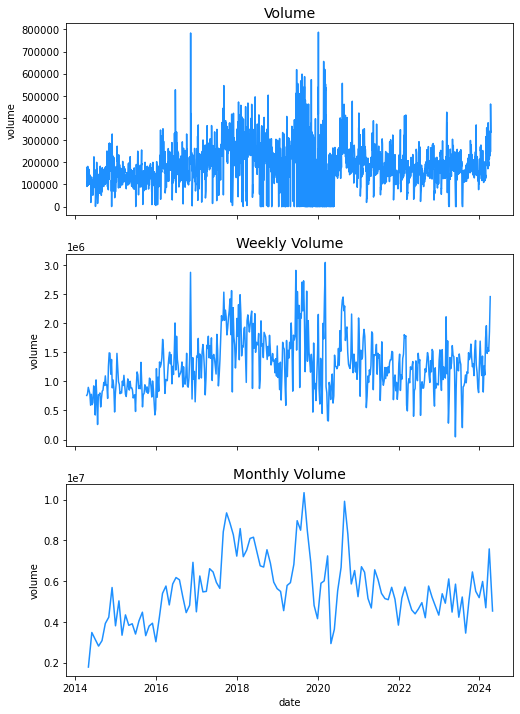

In [18]:
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(8, 12))

sns.lineplot(time_series.index, time_series['volume'], color='dodgerblue', ax=ax[0])
ax[0].set_title('Volume', fontsize=14)

resampled_df = time_series[['volume']].resample('7D').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['volume'], color='dodgerblue', ax=ax[1])
ax[1].set_title('Weekly Volume', fontsize=14)

resampled_df = time_series[['volume']].resample('M').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['volume'], color='dodgerblue', ax=ax[2])
ax[2].set_title('Monthly Volume', fontsize=14)

# Note: I removed ax[i, 0].set_xlim([ts_min_date, ts_max_date]) as ts_min_date and ts_max_date are not defined in your provided code

plt.show()


 As we can see, downsample to weekly could smooth the volume variable and help with analysis, however as a mentione the goal is to predict daily movements, there othe smotthing techniques will be applied.

## Whittaker-Eilers Smoothing

add infor: https://towardsdatascience.com/the-perfect-way-to-smooth-your-noisy-data-4f3fe6b44440

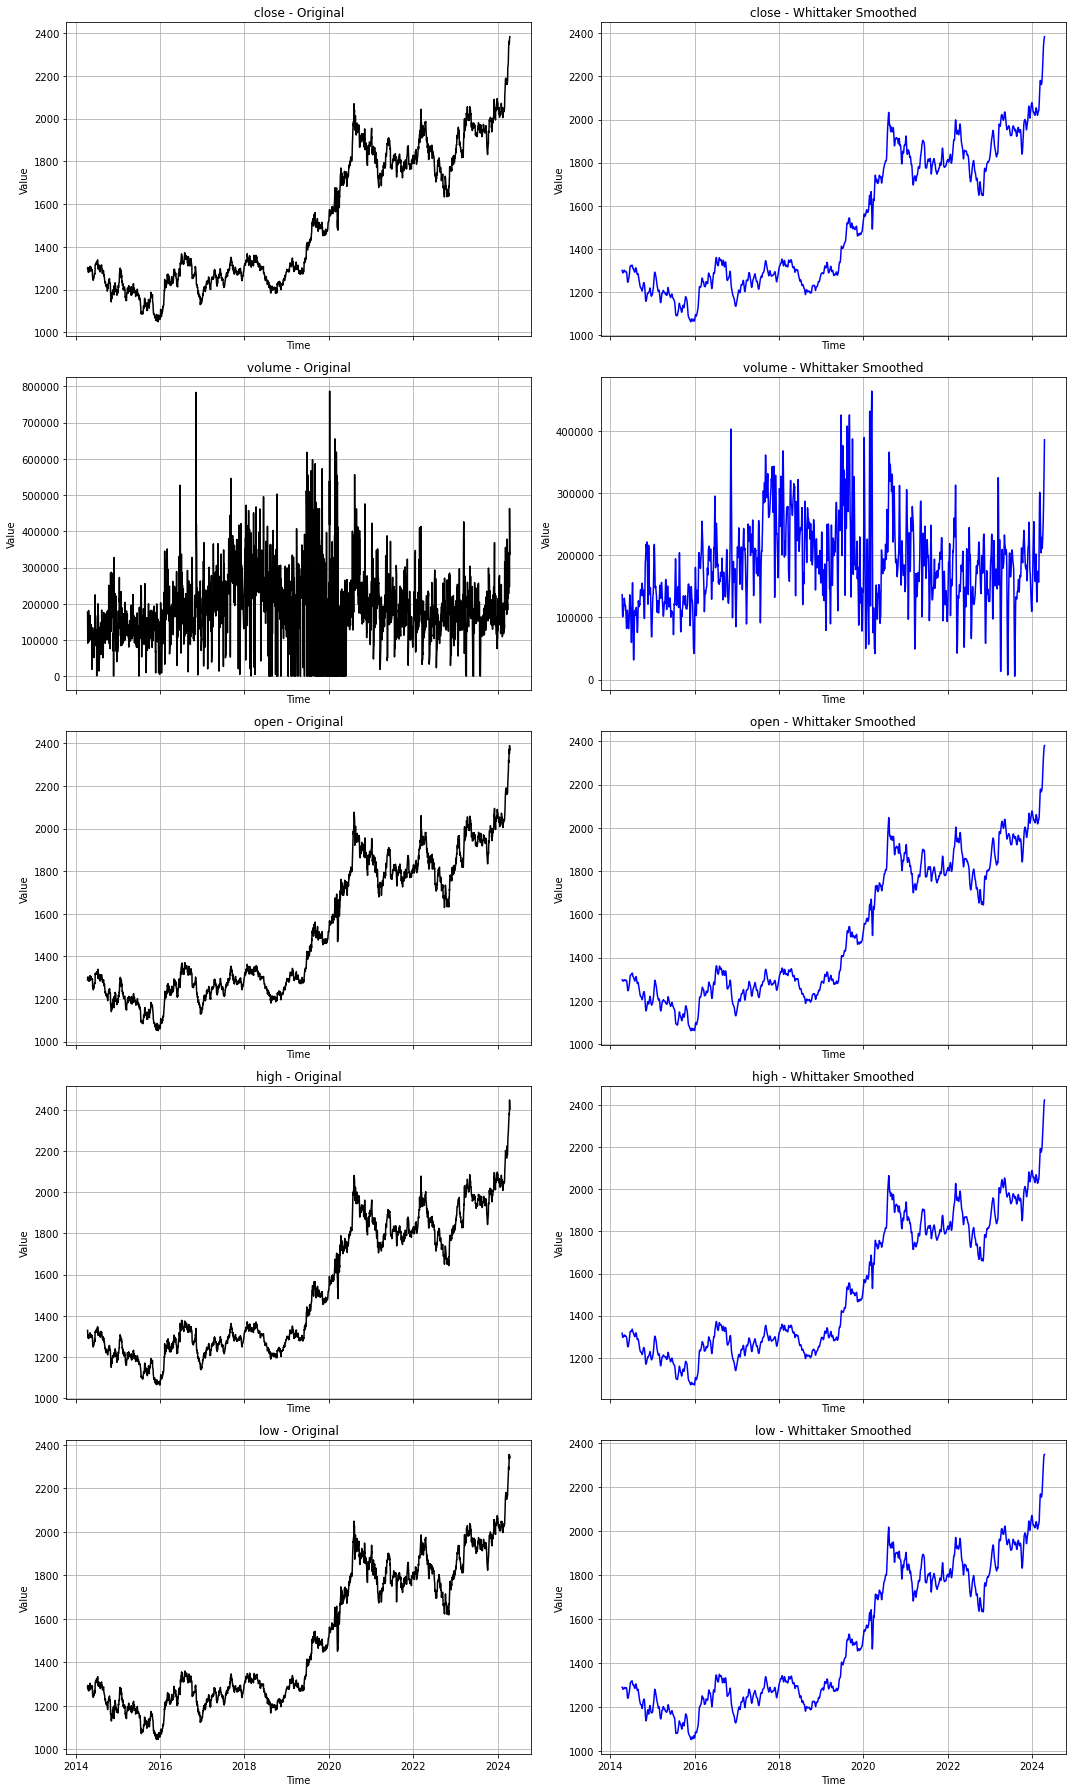

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from whittaker_eilers import WhittakerSmoother

# Create an empty DataFrame to store smoothed values
smoothed_data = pd.DataFrame(index=time_series.index)  # Index will contain dates

# Create subplots
fig, ax = plt.subplots(nrows=time_series.shape[1], ncols=2, figsize=(15, 5*time_series.shape[1]), sharex=True)

# Smooth each column in the time_series DataFrame
for i, column in enumerate(time_series.columns):
    # Smooth the data using WhittakerSmoother
    whittaker_smoother = WhittakerSmoother(
        lmbda=20, order=2, data_length=len(time_series[column])
    )
    smoothed_values = whittaker_smoother.smooth(time_series[column])
    
    # Store the smoothed values in the new DataFrame
    smoothed_data[column] = smoothed_values
    
    # Plot original data
    ax[i, 0].plot(time_series.index, time_series[column], color="black")
    ax[i, 0].set_xlabel('Time')
    ax[i, 0].set_ylabel('Value')
    ax[i, 0].set_title(f'{column} - Original')
    ax[i, 0].grid(True)
    
    # Plot Whittaker smoothed result
    ax[i, 1].plot(time_series.index, smoothed_values, color='blue')
    ax[i, 1].set_xlabel('Time')
    ax[i, 1].set_ylabel('Value')
    ax[i, 1].set_title(f'{column} - Whittaker Smoothed')
    ax[i, 1].grid(True)

plt.tight_layout()
plt.show()

# Now smoothed_data contains the smoothed values for each column in your original DataFrame, including dates


In [20]:
smoothed_data.head()

,close,volume,open,high,low
date,,,,,
2014-04-15,1300.891209,136396.498439,1297.446810,1316.788741,1290.731370
2014-04-16,1298.392890,123640.652176,1297.233767,1311.223899,1290.436573
2014-04-17,1295.865010,112893.230991,1296.673383,1306.239620,1289.825208
2014-04-18,1293.533365,105483.227353,1295.716630,1302.210272,1288.733877
2014-04-19,1291.525499,101648.022182,1294.585809,1299.418242,1287.147923


## 2.3 Stationary

2.3 Stationarity

Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. A time series is considered stationary if its statistical properties remain consistent over time. A stationary time series has:


- constant mean and mean is **independent of time**.
- constant variance and variance is **independent of time**.
- constant covariance and covariance is is **independent of time**.

The variance remains consistent over time.
No discernible trend or seasonality.

When analyzing time series data, consider whether the variance is stable or varies.
If variance is time-dependent, explore techniques like differencing or transformation to achieve stationarity.

Visual Check

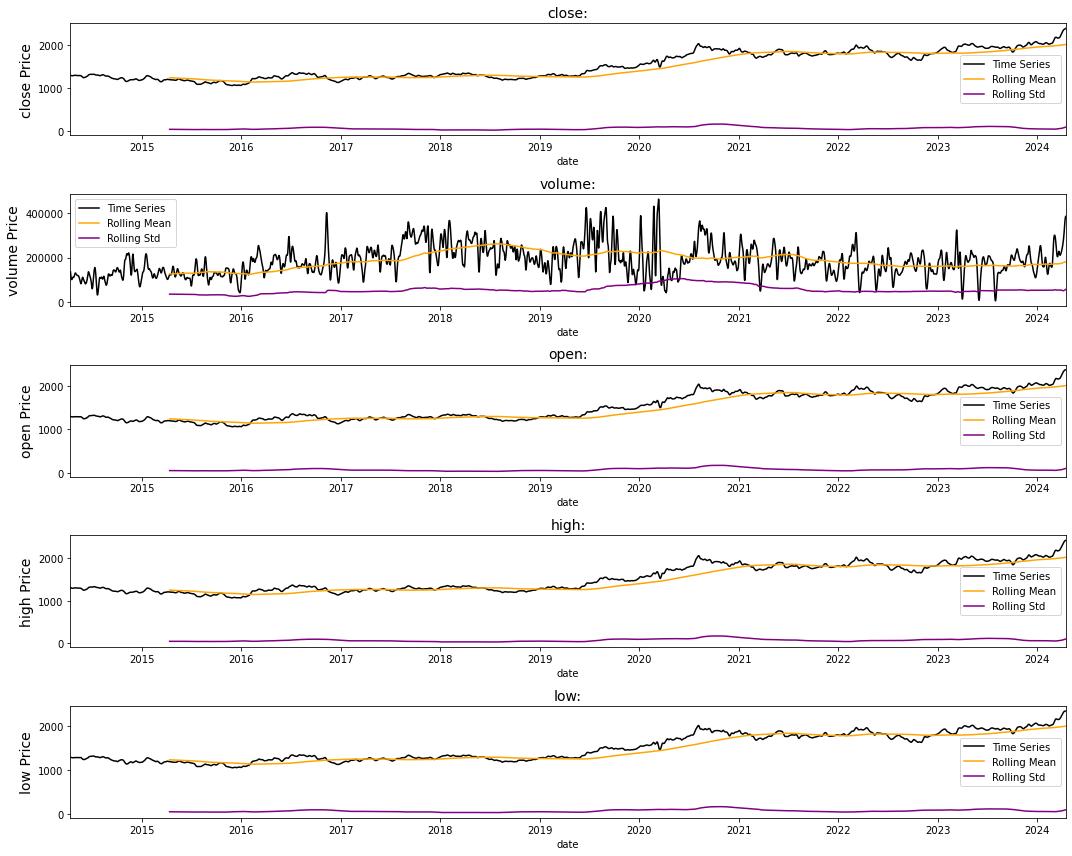

In [21]:
rolling_window = 365

# Create subplots grid
f, ax = plt.subplots(nrows=smoothed_data.shape[1], ncols=1, figsize=(15, 12))

# Iterate over each column in smoothed_data
for i, column in enumerate(smoothed_data.columns):
    # Time Series
    sns.lineplot(x=smoothed_data.index, y=smoothed_data[column], ax=ax[i], color='black', label='Time Series')

    # Rolling Mean
    sns.lineplot(x=smoothed_data.index, y=smoothed_data[column].rolling(rolling_window).mean(), ax=ax[i], color='orange', label='Rolling Mean')

    # Rolling Standard Deviation
    sns.lineplot(x=smoothed_data.index, y=smoothed_data[column].rolling(rolling_window).std(), ax=ax[i], color='purple', label='Rolling Std')

    # Titles and Labels
    ax[i].set_title(f'{column}:', fontsize=14)
    ax[i].set_ylabel(f'{column} Price', fontsize=14)
    ax[i].set_xlim(smoothed_data.index.min(), smoothed_data.index.max())

# Adjust layout and display plot
plt.tight_layout()
plt.show()


Close, Open, High, Low:

The “rolling std” line:
It remains close to zero and relatively flat throughout the entire period (2015 to 2024).
There are no significant spikes or fluctuations.
This suggests that the variability of the data points around the trend line is relatively constant.

Althought the Std  shows low variability, the mean shows a consitent upward moving indicating a non-constant mean - indicating a non-stationary variables


Volume: There's not a a clear trend or seasonality, indicating no time dependency, at the same time the mean and Std is relatively stable over time, indicating stationary. 


#### ADF Test

ADF is a statitical test called a unit root test, where unit roots are a cause for non-stationary.

H0 =  Time series has unit root.

H1 = Time series has not unit root.

**If the null hypothesis can be reject (H0) then te time series is stationary.**

H0 can be rejected if the p-values is below a 5% significance level (default significance level):

    p-value >  signifiance level 0.05, Fail to reject H0, data is non_stationary
    p-value <= signifiance level 0.05, Reject H0, the data is stationary

H0 can be rejected if the ADF Statistic are below te the critial value:
    
    ADF Statistic > critical value : Fail to reject H0, the data is non-staionaty.
    ADF Statistic < critical value : Reject H0, the data is staionaty.
    
    

In [22]:
from statsmodels.tsa.stattools import adfuller

adf_results = {} #dictionary to save AFD test results

for i, column in enumerate(smoothed_data.columns):
    
    results = adfuller(smoothed_data[column].values)
    
    adf_results[column]= results
    
        
# Display the ADF test results for each column
for column, result in adf_results.items():
    print(f"Column: {column.capitalize()}")
    print(f"p-value: {result[1]}")
    print(f"ADF Statistic: {result[0]}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    print("\n")    
 

Column: Close
p-value: 0.9915204139579321
ADF Statistic: 0.7928830340480424
Critical Values:
	1%: -3.432149263499404
	5%: -2.8623350143451307
	10%: -2.5671931983337477


Column: Volume
p-value: 1.0680667217431862e-05
ADF Statistic: -5.158478316984317
Critical Values:
	1%: -3.43215622115055
	5%: -2.862338087688428
	10%: -2.5671948344809046


Column: Open
p-value: 0.9882871873852972
ADF Statistic: 0.6280585186824611
Critical Values:
	1%: -3.432148768574872
	5%: -2.862334795726108
	10%: -2.5671930819481976


Column: High
p-value: 0.9917683843612565
ADF Statistic: 0.8082630065210866
Critical Values:
	1%: -3.432149263499404
	5%: -2.8623350143451307
	10%: -2.5671931983337477


Column: Low
p-value: 0.9834442160016049
ADF Statistic: 0.45514912702455035
Critical Values:
	1%: -3.4321438342637873
	5%: -2.8623326161306752
	10%: -2.5671919216038828




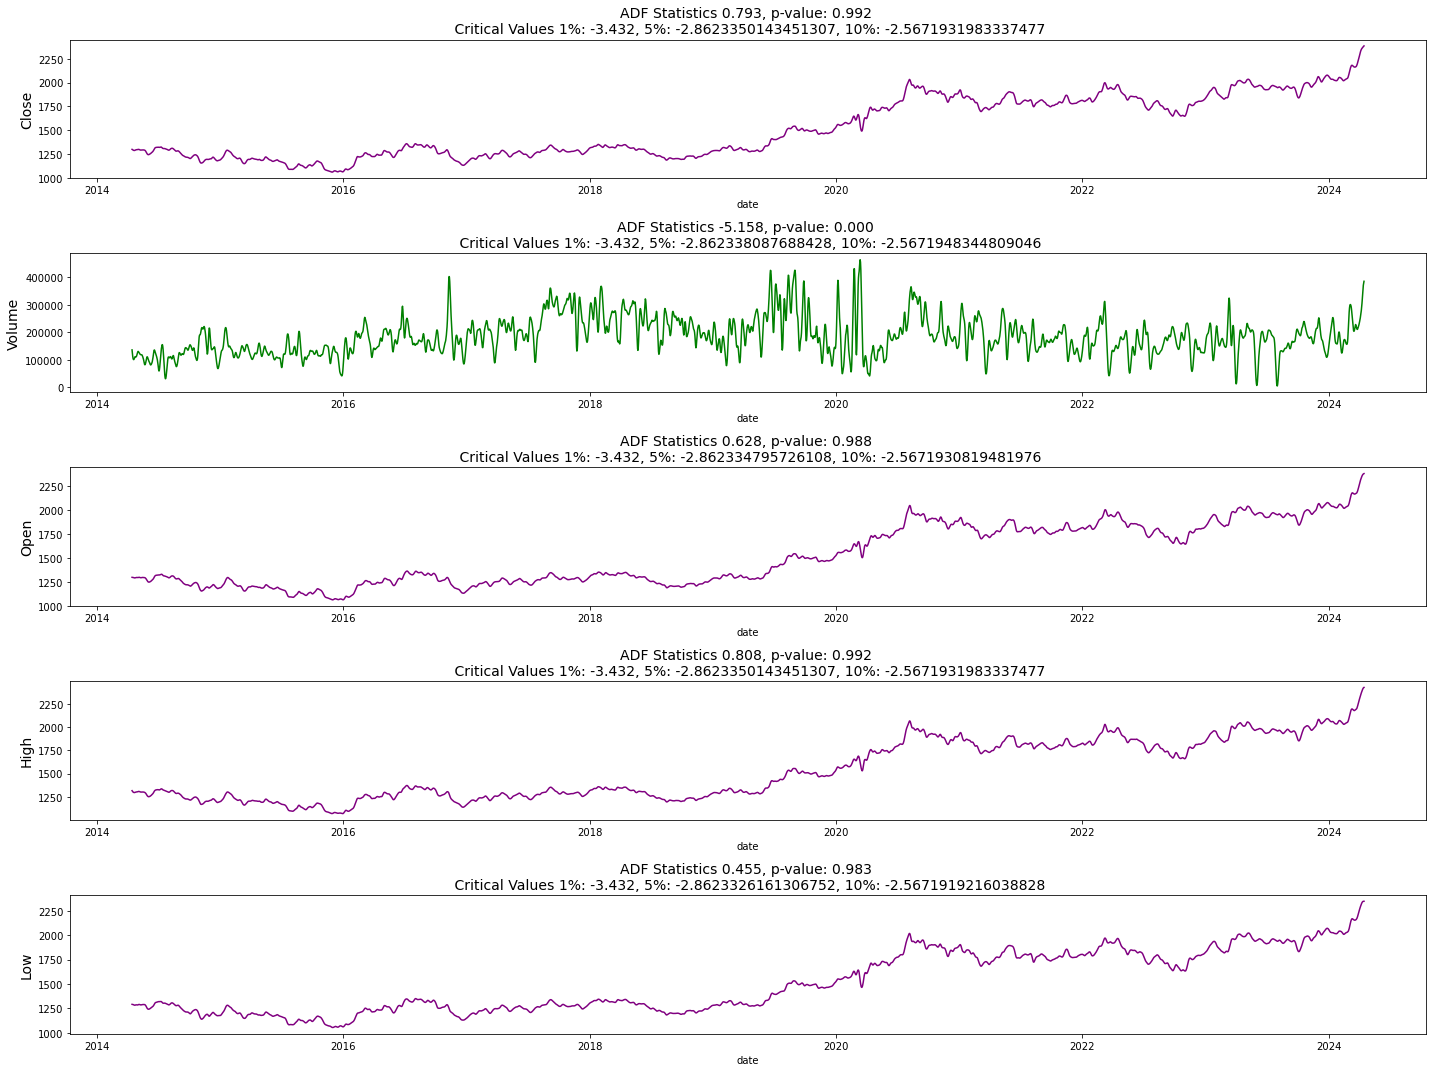

In [23]:
f, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (20,15))

def plot_adf_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_value = result[1]
    critical_val1 = result[4]['1%']
    critical_val5 = result[4]['5%']
    critical_val10 = result[4]['10%']
    
    if (p_value < significance_level) & ((adf_stat < critical_val1)):
        linecolor = 'green'
    elif (p_value < significance_level) & (adf_stat < critical_val5):
        linecolor = 'orange'
    elif (p_value < significance_level) & (adf_stat < critical_val10):
        linecolor = 'red'
    else: 
        linecolor = 'purple'
    sns.lineplot(x = smoothed_data.index, y= series, ax = ax, color = linecolor)
    ax.set_title (f'ADF Statistics {adf_stat :0.3f}, p-value: {p_value:0.3f} \n Critical Values 1%: {critical_val1:0.3f}, 5%: {critical_val5}, 10%: {critical_val10}', fontsize = 14)   
    ax.set_ylabel(ylabel=title, fontsize=14)

for i, column in enumerate(smoothed_data.columns):
    plot_adf_results(smoothed_data[column].values,column.capitalize(),ax[i])
                            

plt.tight_layout()
plt.show()                                                                       

Close, Open, High, Low:

The p-values are very high (0.9915, 0.988, 0.991, 0.983) respectively, indicating that we fail to reject the null hypothesis of non-stationarity.
Additionally, the ADF statistics are positive (0.7929, 0.628, 0.808, 0.455) respectively, suggesting non-stationarity.

Volume:

The p-value is extremely low (approximately 0), providing strong evidence against the null hypothesis of non-stationarity.
The ADF statistic is highly negative (-5.1585), indicating stationarity.

If the data is not stationary and we are using the ARIMA model, which reuires a stationary data, hte data has to be trasform.

Two common tnaformation methods are:

 **Differencing**:
- Purpose: To remove trends and make the series stationary.
- How? Calculate the difference between consecutive terms (lags). For a time series {Xt}, the first difference is given by Xt - Xt-1.
- Why? Differencing removes the trend component, making the mean constant.
- When to Use? If your series has a clear trend (upward or downward), differencing can help.

**Transformations**:
- Purpose: To stabilize variance (reduce heteroscedasticity).
- How? Apply mathematical transformations to the data (e.g., logarithm, square root).
- Why? Transformations can stabilize the variance and make it more consistent.
- When to Use? When the variance changes significantly over time.
 

Close, Open High and Low variable are non-stationary and will be transformed using hte Differencing methonds to remove the trand componest and make te mean constant.

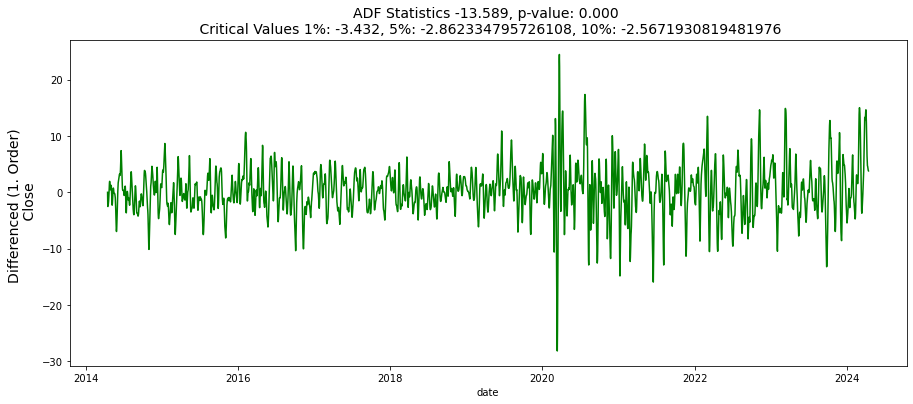

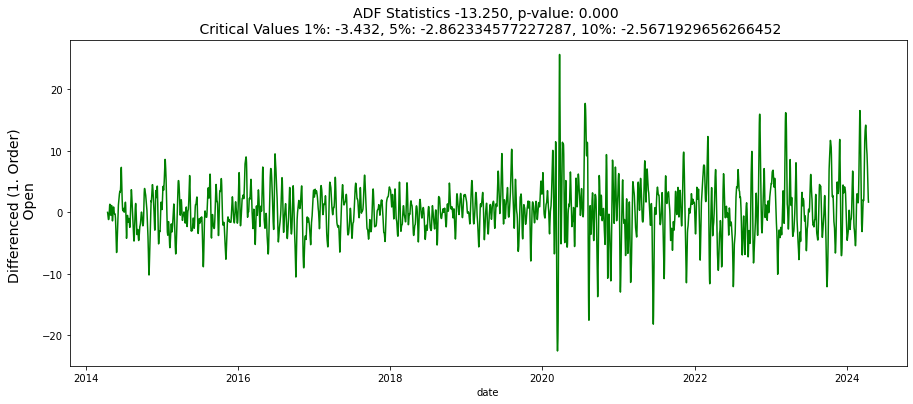

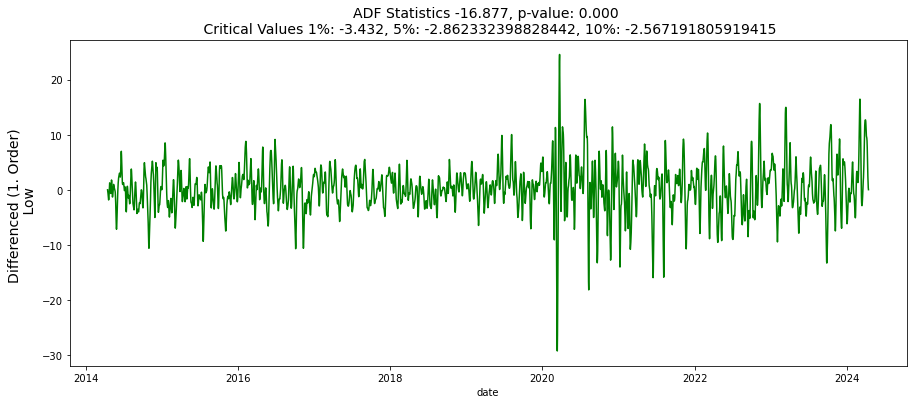

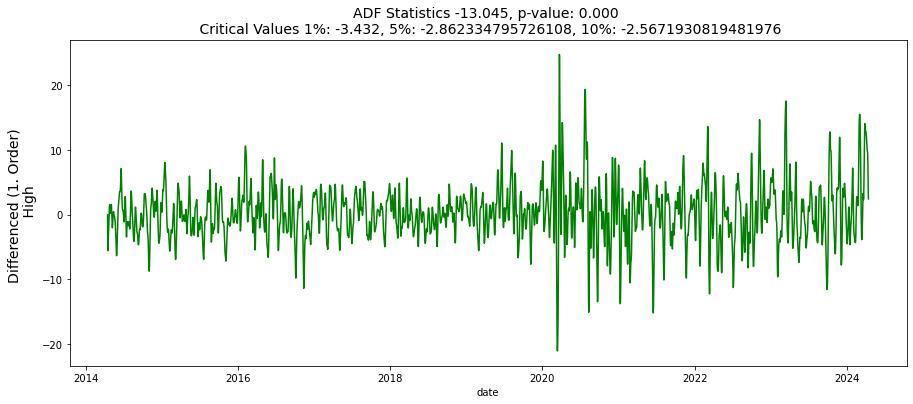

In [24]:
transformed_data = smoothed_data
temp_df = pd.DataFrame()

ts_diff = np.diff(transformed_data['close'])
temp_df['close_diff_1'] = np.append([0],ts_diff)

ts_diff = np.diff(transformed_data['high'])
temp_df['high_diff_1'] = np.append([0],ts_diff)

ts_diff = np.diff(transformed_data['open'])
temp_df['open_diff_1'] = np.append([0],ts_diff)

ts_diff = np.diff(transformed_data['low'])
temp_df['low_diff_1'] = np.append([0],ts_diff)

ts_diff = np.diff(transformed_data['high'])
temp_df['high_diff_1'] = np.append([0],ts_diff)


f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
plot_adf_results(temp_df['close_diff_1'], 'Differenced (1. Order) \n Close', ax)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
plot_adf_results(temp_df['open_diff_1'], 'Differenced (1. Order) \n Open', ax)


f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
plot_adf_results(temp_df['low_diff_1'], 'Differenced (1. Order) \n Low', ax)


f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
plot_adf_results(temp_df['high_diff_1'], 'Differenced (1. Order) \n High', ax)



transformed_data = pd.concat([transformed_data, temp_df], ignore_index=True)


In [25]:
transformed_data 

,close,volume,open,high,low,close_diff_1,high_diff_1,open_diff_1,low_diff_1
0,1300.891209,136396.498439,1297.446810,1316.788741,1290.731370,NaN,NaN,NaN,NaN
1,1298.392890,123640.652176,1297.233767,1311.223899,1290.436573,NaN,NaN,NaN,NaN
2,1295.865010,112893.230991,1296.673383,1306.239620,1289.825208,NaN,NaN,NaN,NaN
3,1293.533365,105483.227353,1295.716630,1302.210272,1288.733877,NaN,NaN,NaN,NaN
4,1291.525499,101648.022182,1294.585809,1299.418242,1287.147923,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7303,NaN,NaN,NaN,NaN,NaN,4.617916,9.464200,6.008716,4.038174
7304,NaN,NaN,NaN,NaN,NaN,4.323416,8.235573,4.948604,2.515963
7305,NaN,NaN,NaN,NaN,NaN,4.052823,5.635266,3.405600,1.204392
7306,NaN,NaN,NaN,NaN,NaN,3.873998,3.446551,2.204046,0.365448
